In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model


In [4]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
# Narmalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()


In [10]:
# number of classes
K = len(set(y_train))
# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0     

In [11]:
# Compile
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])


In [12]:
# Fit
r = model.fit(
x_train, y_train, validation_data=(x_test, y_test), epochs=50)


Epoch 1/50
1563/1563 [==============================] - 35s 9ms/step - loss: 1.2938 - accuracy: 0.5555 - val_loss: 1.2695 - val_accuracy: 0.5897
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8444 - accuracy: 0.7068 - val_loss: 0.7929 - val_accuracy: 0.7299
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6981 - accuracy: 0.7607 - val_loss: 0.7611 - val_accuracy: 0.7396
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5862 - accuracy: 0.7998 - val_loss: 0.6751 - val_accuracy: 0.7739
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4965 - accuracy: 0.8280 - val_loss: 0.6518 - val_accuracy: 0.7846
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4202 - accuracy: 0.8528 - val_loss: 0.6190 - val_accuracy: 0.8046
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3577 - accuracy: 0.8767 - val_loss: 0.6395 - val_ac

In [13]:
# Fit with data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test),
			steps_per_epoch=steps_per_epoch, epochs=50)


Epoch 1/50
1562/1562 [==============================] - 22s 14ms/step - loss: 0.5537 - accuracy: 0.8244 - val_loss: 0.5047 - val_accuracy: 0.8360
Epoch 2/50
1562/1562 [==============================] - 21s 13ms/step - loss: 0.4447 - accuracy: 0.8528 - val_loss: 0.5227 - val_accuracy: 0.8403
Epoch 3/50
1562/1562 [==============================] - 21s 13ms/step - loss: 0.4039 - accuracy: 0.8647 - val_loss: 0.5091 - val_accuracy: 0.8314
Epoch 4/50
1562/1562 [==============================] - 21s 13ms/step - loss: 0.3796 - accuracy: 0.8728 - val_loss: 0.4649 - val_accuracy: 0.8538
Epoch 5/50
1562/1562 [==============================] - 22s 14ms/step - loss: 0.3621 - accuracy: 0.8777 - val_loss: 0.4798 - val_accuracy: 0.8541
Epoch 6/50
1562/1562 [==============================] - 22s 14ms/step - loss: 0.3455 - accuracy: 0.8854 - val_loss: 0.4394 - val_accuracy: 0.8633
Epoch 7/50
1562/1562 [==============================] - 21s 14ms/step - loss: 0.3311 - accuracy: 0.8879 - val_loss: 0.5113 -

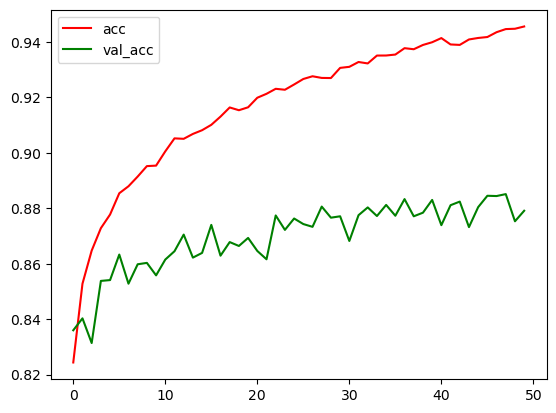

In [14]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()


1/1 [==============================] - 0s 19ms/step
['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
Original label is Airplane and predicted label is Airplane


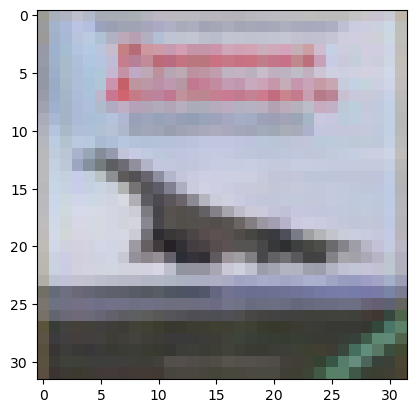

In [33]:
# label mapping

labels = '''Airplane Automobile Bird Cat Deer Dog Frog Horse Ship Truck'''.split()

# select the image from our test dataset
image_number = 3

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]
print(labels)

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))


In [34]:
# save the model
model.save('Image Classification with CIFAR-10.h5')
